Apply Basic PCA on the iris dataset
• Describe the data set. Should the dataset been standardized?

• Describe the structure of correlations among variables.

• Compute a PCA with the maximum number of components.

• Compute the cumulative explained variance ratio. Determine the number of components𝐾 by your computed values.

• Print the 𝐾principal components directions and correlations of the 𝐾principal compo-nents with the original variables. Interpret the contribution of the original variables into the PC.

• Plot the samples projected into the𝐾first PCs.

• Color samples by their species.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.preprocessing import StandardScaler

In [26]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
x = data[['sepal_length','sepal_width','petal_length','petal_width']]
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [28]:
corr = data.corr(method='pearson')
print("Correlation between variables")
display(corr)

Correlation between variables


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [29]:
from sklearn.decomposition import PCA
print("PCA")
pca = PCA()
x_new1 =pca.fit_transform(data.drop(["species"],axis =1))
x_new1[:5]

PCA


array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

EXPLAINED VARIANCE OF R2
[0.92461872 0.05306648 0.01710261 0.00521218]


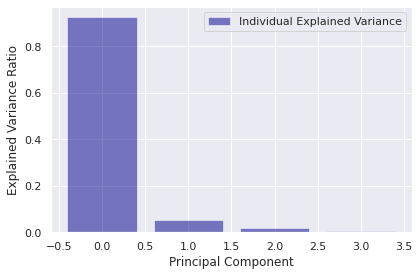

In [30]:
print("EXPLAINED VARIANCE OF R2")
explained_variance= pca.explained_variance_ratio_

print(explained_variance)

plt.figure(figsize =(6,4))
plt.bar(range(4),explained_variance, alpha=0.5, align='center', label ="Individual Explained Variance", color ="darkblue")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.legend(loc ="best")
plt.tight_layout()

In [31]:
print("Apply PCA")
pca  = PCA(n_components=3)
x_new =pca.fit_transform(data.drop(['species'],axis =1))
x_new[:5]

Apply PCA


array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

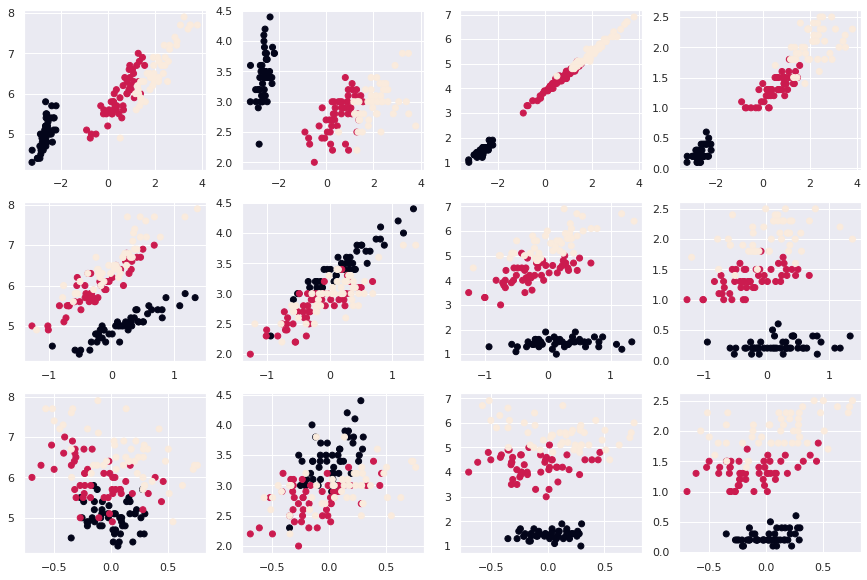

In [32]:
categ_num ={"species":{"setosa":0,"versicolor":1,"virginica":2}}
iris_data1 = data.replace(categ_num)
columns = list(data.columns[:4])
fig, axes =plt.subplots(3,4,figsize =(15,10))
k= 0
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i,j].scatter(x_new[:,i],data[columns[j]],c =iris_data1["species"])
plt.show()